# __Learning X2K: Genetic Algorithm Results__

## __Import data__

In [1]:
%matplotlib inline
%config InlineBackend.print_figure_kwargs = {'bbox_inches':None}

import os
#root = '/Users/maayanlab/Dropbox/Maayan_Lab/X2K_mobile_pipeline/X2K_Genetic_Algorithm'
root = os.getcwd()
import numpy as np
import matplotlib.pyplot as plt
# Import my functions
import Python_scripts.Extra_X2K_functions as Ex

# Data   
GA_output_name = 'GA_results.100pop.10gen.GEO.run3.npy' #
#®GA_output_name = 'GA_results.100pop.10gen.L1000-DRH.npy' #

results_file = root+'/GA_Results/GEO/'+GA_output_name
GA_Results = np.load(results_file)
# Make folder for saved images
figDir = 'Figures/'+GA_output_name
if not os.path.exists(figDir):
    os.makedirs(figDir)
# Extract subsets
## Subset 1
GAresults_Subset1 = GA_Results[0]
allPopulations = GAresults_Subset1[0]# Get all populations
allFitnesses = GAresults_Subset1[1] # Get all fitnesses
averageFitness = GAresults_Subset1[2] # Get averageFitnenss per generation
peakFitness = GAresults_Subset1[3] # Get the peakFitness per generation
GAsettings = GAresults_Subset1[4]
average_PPI_sizes = GAresults_Subset1[5] # Average_PPI_sizes
## Subset 2
allFitnesses_Subset2 = GA_Results[1]
averageFitness_Subset2 = GA_Results[2]
peakFitness_Subset2 = GA_Results[3]


chance = 4.22;

## __GA Settings__

In [2]:
GAsettings

{'breedingVariation': 0,
 'childrenPerGeneration': 90,
 'crossoverPoints': 3,
 'includeFittestParents': 10,
 'initialPopSize': 100,
 'mutationRate': 0.01,
 'numberOfGenerations': 10,
 'parameterLength': 35,
 'topNum': 10}

## Report Peak Fitnesses

In [3]:
print('Peak fitness for X2K GA, Subset1 = '+str(round(peakFitness[-1],2))+'%')
print('Peak fitness for X2K GA, Subset2 = '+str(round(peakFitness_Subset2[-1],2))+'%\n')
print("===============================\n")
print('OPTIMIZED PARAMETERS:')
print(str(Ex.tell_parameters(Ex.getFittestIndividual(GAresults_Subset1))))


avg = sum(average_PPI_sizes[-1]) / len(average_PPI_sizes[-1])
print()
print("===============================\n")
print("Average PPI size in final Subset1 population = "+str(avg));

Peak fitness for X2K GA, Subset1 = 28.46%
Peak fitness for X2K GA, Subset2 = 18.6%


OPTIMIZED PARAMETERS:

___TF (CHEA) Parameters___
run;rank;mouse;transfac;humanarchs4;20

___PPI (G2N) Parameters___
run;BIOCARTA,INNATEDB,KEGG,MINT,MIPS,PDZBASE,PPID;2

___KINASE (KEA) Parameters___
run;pvalue;humanarchs4;P;20

('run;rank;mouse;transfac;humanarchs4;20', 'run;BIOCARTA,INNATEDB,KEGG,MINT,MIPS,PDZBASE,PPID;2', 'run;pvalue;humanarchs4;P;20')


Average PPI size in final Subset1 population = 2353.1017692307646


## __Overfitting Tests__

### Average fitness 

/Users/schilder/Library/Python/3.6/lib/python/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                      sum_sq      df           F         PR(>F)
Trained_v_Test  17332.565681     1.0  692.101635  3.174910e-131
Residual        50036.677363  1998.0         NaN            NaN
************************************************************************
Training and Test runs DO significantly differ


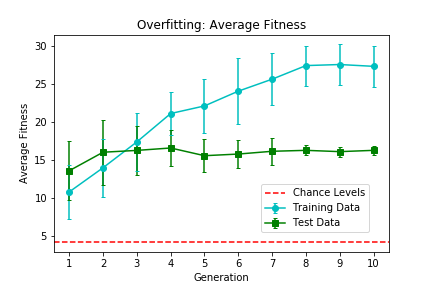

In [4]:
#y_s1 = GAresults_Subset1[2] # average fitness for each generation in TRAINED data
#y_s2 = averageFitness_Subset2

# Calculate average for subset one
y1 = allFitnesses
x = range(1,len(y1)+1)
x, y_s1 = zip(*sorted((xVal, np.mean([yVal for a, yVal in zip(x, y1) if xVal==a])) for xVal in set(x)))
# Calculate average for subset 2
y2 = allFitnesses_Subset2 
x, y_s2 = zip(*sorted((xVal, np.mean([yVal for a, yVal in zip(x, y2) if xVal==a])) for xVal in set(x)))

yerr1 = np.std(y1, axis=1)
yerr2 = np.std(y2, axis=1)
plt.errorbar(x, y_s1, yerr=yerr1, color='c', marker='o', capsize=2, label="Training Data")
plt.errorbar(x, y_s2, yerr=yerr2, color='g', marker='s', capsize=2, label="Test Data")
plt.axhline(y=chance, linestyle="--", color='r', label="Chance Levels")
plt.title('Overfitting: Average Fitness')
plt.xlabel('Generation')
plt.ylabel('Average Fitness')
plt.xticks(np.arange(1, max(x)+1, 1))
plt.legend(loc='lower right', borderaxespad=2)
plt.gcf().set_facecolor('white')

plt.savefig(figDir+'/OverfittingAvg.eps', format='eps', dpi=1000)


# TEST OVERFITTING
import pandas as pd
## Unlist Subset1 Fitnesses
fit1_df = pd.DataFrame(Ex.parameterDF(GAresults_Subset1)['Fitness'])
fit1_df.columns = ['Average_Fitness']
fit1_df['Trained_v_Test'] = 'Trained'
## Unlist Subset2 Fitnesses
fit2 = []
for sublist in allFitnesses_Subset2:
    for item in sublist:
        fit2.append(item)
fit2_df = pd.DataFrame(fit2, columns=['Average_Fitness'])
fit2_df['Trained_v_Test'] = 'Test'

lm_data = pd.concat([fit1_df, fit2_df])
## Get OLS R2
import statsmodels.api as sm
from statsmodels.formula.api import ols
mod = ols('Average_Fitness ~ Trained_v_Test',data=lm_data).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
p = aov_table['PR(>F)'][0]
mod.summary()

print(aov_table)
print("************************************************************************")
if p>0.05:
    print('Training and Test runs do NOT significantly differ.')
else:
    print('Training and Test runs DO significantly differ');

### Peak fitness

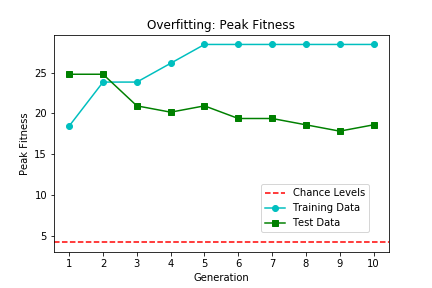

In [5]:
y_s1 = GAresults_Subset1[3] # Peak fitness for each generation in TRAINED data
y_s2 = peakFitness_Subset2
x = range(1,len(y_s1)+1)
# Error bars wouldn't make sense since there's only one peak fitness per gen
#yerr1 = 0.1 + 0.2*np.sqrt(y_s1)
#yerr2 = 0.1 + 0.2*np.sqrt(y_s2)
plt.errorbar(x, y_s1, color='c', marker='o', capsize=2, label="Training Data")
plt.errorbar(x, y_s2, color='g', marker='s', capsize=2, label="Test Data")
plt.axhline(y=chance, linestyle="--", color='r', label="Chance Levels")
plt.title('Overfitting: Peak Fitness')
plt.xlabel('Generation')
plt.ylabel('Peak Fitness')
plt.xticks(np.arange(1, max(x)+1, 1))
plt.legend(loc='lower right', borderaxespad=2)
plt.gcf().set_facecolor('white')
    
plt.savefig(figDir+'/OverfittingPeak.eps', format='eps', dpi=1000);

### Plot the distribution of ALL fitnesses in sampling of generations

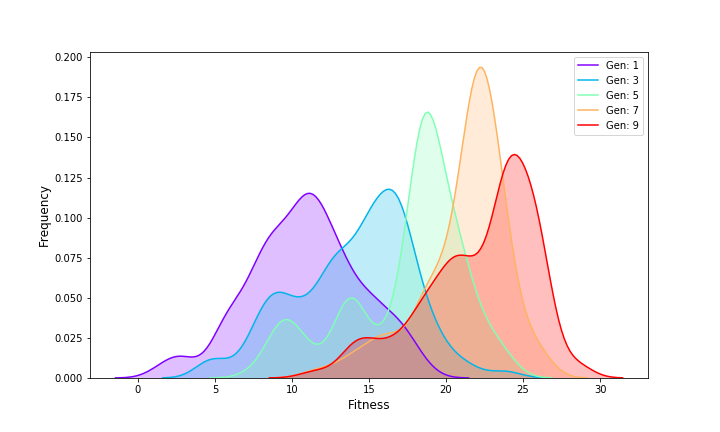

In [6]:
Ex.fitnessHistogramCurves(allFitnesses, genSpacing=2)

plt.savefig(figDir+'/KDEfitnessPlot.png', format='png', dpi=1000);
# EPS format doesn't support transparency. Have to save as png instead.


## __4. X2K Parameters vs. Fitness Analyses__

### Plot Fitness and Parameter Evolution Over Time


___TF (CHEA) Parameters___
run;rank;mouse;transfac;humanarchs4;20

___PPI (G2N) Parameters___
run;BIOCARTA,INNATEDB,KEGG,MINT,MIPS,PDZBASE,PPID;2

___KINASE (KEA) Parameters___
run;pvalue;humanarchs4;P;20



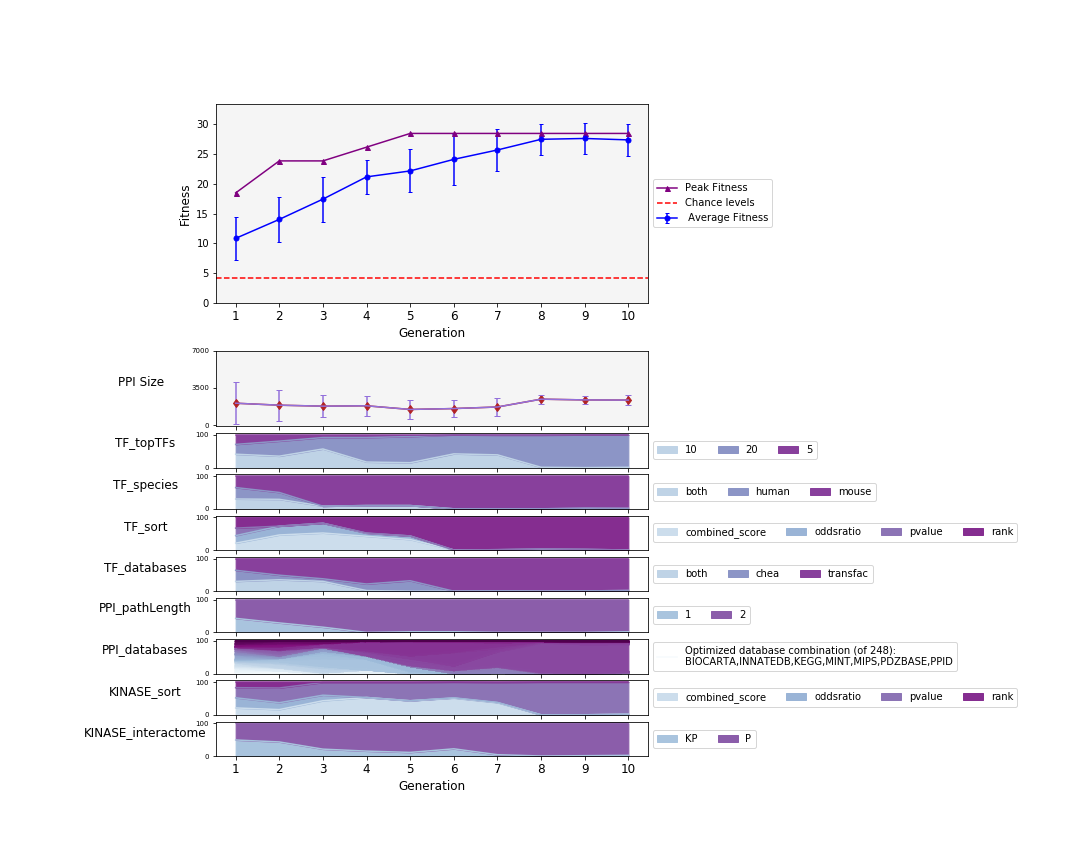

In [7]:
Ex.parameterEvolutionPlot(GAresults_Subset1,figsize=(15,12),saveFig=figDir+'/ParamEvolution.eps');

### Plot Select X2K Parameters vs. Fitness

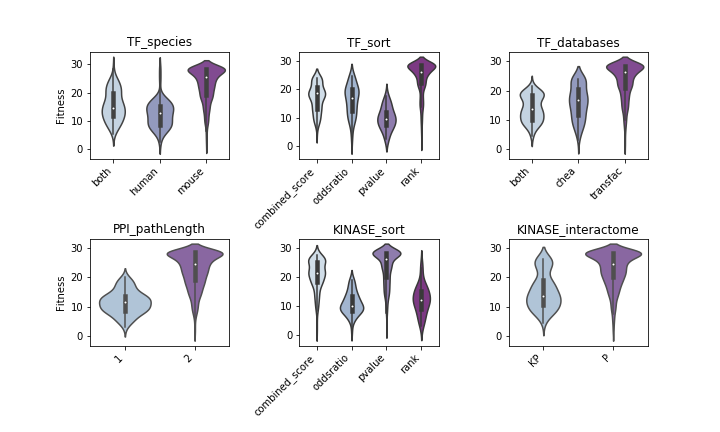

In [8]:
Ex.ParameterBoxplots(GAresults_Subset1, numRows=2, numCols=3, figSize=(10,6), saveFig=figDir+'/Parameters.Vs.Fitness.eps');

### One-way ANOVAs: Each parameter vs. Fitness

In [9]:
Ex.parameterStats(GAresults_Subset1, writeExcel=figDir+"Parameter.v.Fitness_ANOVA.table.xlsx")

/Users/schilder/Library/Python/3.6/lib/python/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/schilder/Library/Python/3.6/lib/python/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/schilder/Library/Python/3.6/lib/python/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


                       df        sum_sq       mean_sq           F  \
TF_species            2.0  10480.915898   5240.457949  159.500192   
Residual            997.0  32756.929664     32.855496         NaN   
TF_sort               3.0  15807.382402   5269.127467  191.321996   
Residual            996.0  27430.463160     27.540626         NaN   
TF_databases          2.0  11385.586684   5692.793342  178.188774   
Residual            997.0  31852.258878     31.948103         NaN   
PPI_pathLength        1.0  10703.420385  10703.420385  328.329561   
Residual            998.0  32534.425177     32.599624         NaN   
PPI_databases       247.0  36558.477830    148.010032   16.663784   
Residual            752.0   6679.367732      8.882138         NaN   
KINASE_sort           3.0  14493.715798   4831.238599  167.405091   
Residual            996.0  28744.129764     28.859568         NaN   
KINASE_interactome    1.0   7778.529747   7778.529747  218.926184   
Residual            998.0  35459.3

ValueError: No engine for filetype: 'xlsc'